<a href="https://colab.research.google.com/github/Dhiraj-jadhav04/Prodigy_DS_05/blob/main/Prodigy_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
index

In [17]:

file_path = 'only_road_accidents_data3.csv'
data = pd.read_csv('/content/only_road_accidents_data3.csv')

In [18]:
data.head(5)

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [19]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        STATE/UT  YEAR  0-3 hrs. (Night)  3-6 hrs. (Night)  6-9 hrs (Day)  \
0  A & N Islands  2001                 2                 6             29   
1  A & N Islands  2002                 2                 6             22   
2  A & N Islands  2003                 2                 8             31   
3  A & N Islands  2004                 2                 5             29   
4  A & N Islands  2005                 0                 8             27   

   9-12 hrs (Day)  12-15 hrs (Day)  15-18 hrs (Day)  18-21 hrs (Night)  \
0              40               39               40                 18   
1              41               33               33                 23   
2              35               28               36                 25   
3              42               43               43                 37   
4              28               38               42                 50   

   21-24 hrs (Night)  Total  
0                  7    181  
1

In [20]:

print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['STATE/UT', 'YEAR', '0-3 hrs. (Night)', '3-6 hrs. (Night)',
       '6-9 hrs (Day)', '9-12 hrs (Day)', '12-15 hrs (Day)', '15-18 hrs (Day)',
       '18-21 hrs (Night)', '21-24 hrs (Night)', 'Total'],
      dtype='object')


In [21]:
data_by_states=data.loc[:,['STATE/UT','YEAR','Total']]

In [22]:
data_by_states.head()

,STATE/UT,YEAR,Total
0,A & N Islands,2001,181
1,A & N Islands,2002,168
2,A & N Islands,2003,180
3,A & N Islands,2004,215
4,A & N Islands,2005,206


In [23]:
df1=data_by_states.drop('YEAR',axis=1)
df1.head()

,STATE/UT,Total
0,A & N Islands,181
1,A & N Islands,168
2,A & N Islands,180
3,A & N Islands,215
4,A & N Islands,206


In [24]:
df1=df1.groupby('STATE/UT').sum().reset_index().sort_values(by='Total',ascending=False)

In [25]:
df1.head()

,STATE/UT,Total
30,Tamil Nadu,852073
20,Maharashtra,641614
16,Karnataka,584761
1,Andhra Pradesh,546821
17,Kerala,518161


<ipython-input-26-f50da9f73c68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['STATE/UT'],y=df1['Total'],palette='rainbow')


Text(0.5, 1.0, 'Cases of road accidents in each state/UT from 2001-14')

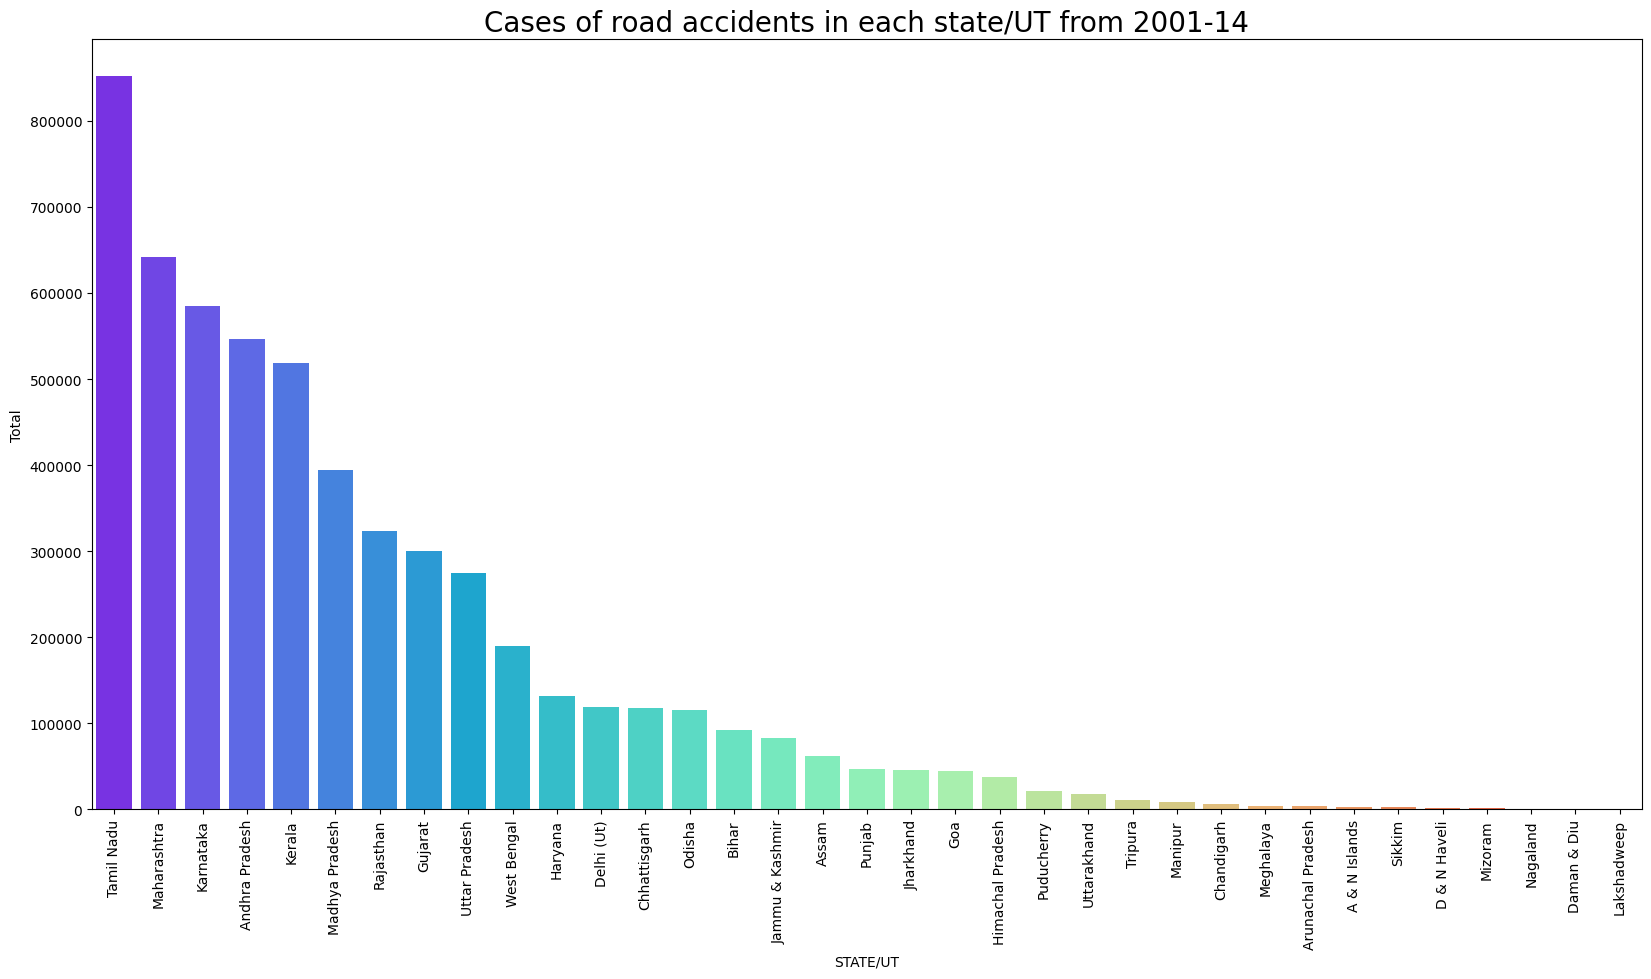

In [26]:
plt.figure(figsize=(20,10))

sns.barplot(x=df1['STATE/UT'],y=df1['Total'],palette='rainbow')
plt.xticks(rotation=90)

plt.title('Cases of road accidents in each state/UT from 2001-14',size=20)

In [27]:
df_top=df1[df1['Total']>300000]
df_top

,STATE/UT,Total
30,Tamil Nadu,852073
20,Maharashtra,641614
16,Karnataka,584761
1,Andhra Pradesh,546821
17,Kerala,518161
19,Madhya Pradesh,394007
28,Rajasthan,323653
11,Gujarat,300325


<ipython-input-28-7a2d4b35faa5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top['STATE/UT'],y=df_top['Total'],palette='gnuplot_d')


Text(0.5, 1.0, 'States with highest road accidents between 2001-14')

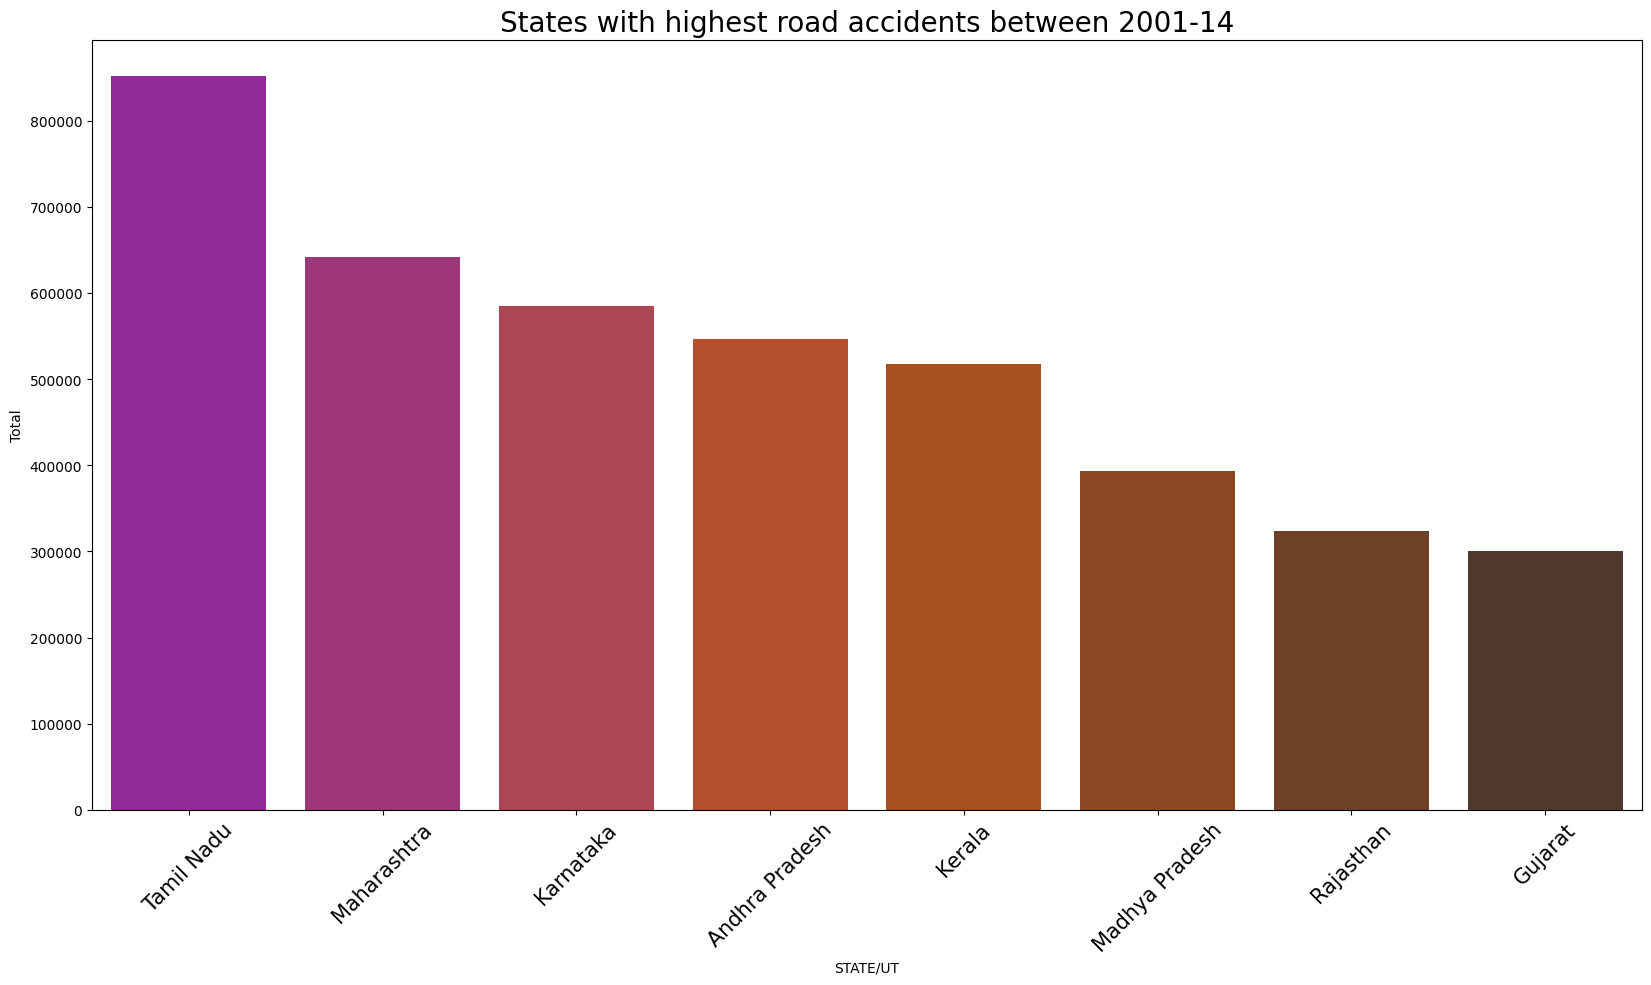

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_top['STATE/UT'],y=df_top['Total'],palette='gnuplot_d')
plt.xticks(size=15,rotation=45)
plt.yticks(size=10)

plt.title('States with highest road accidents between 2001-14',size=20)

In [29]:
df_year=data_by_states.groupby('YEAR').sum().reset_index()

In [30]:
df_year

,YEAR,STATE/UT,Total
0,2001,A & N IslandsAndhra PradeshArunachal PradeshAs...,323720
1,2002,A & N IslandsAndhra PradeshArunachal PradeshAs...,335707
2,2003,A & N IslandsAndhra PradeshArunachal PradeshAs...,336468
3,2004,A & N IslandsAndhra PradeshArunachal PradeshAs...,361343
4,2005,A & N IslandsAndhra PradeshArunachal PradeshAs...,390378
5,2006,A & N IslandsAndhra PradeshArunachal PradeshAs...,394432
6,2007,A & N IslandsAndhra PradeshArunachal PradeshAs...,418657
7,2008,A & N IslandsAndhra PradeshArunachal PradeshAs...,415855
8,2009,A & N IslandsAndhra PradeshArunachal PradeshAs...,421628
9,2010,A & N IslandsAndhra PradeshArunachal PradeshAs...,430654


In [31]:
df_year['Percentage change']=df_year['Total'].pct_change().round(2)
df_year

,YEAR,STATE/UT,Total,Percentage change
0,2001,A & N IslandsAndhra PradeshArunachal PradeshAs...,323720,NaN
1,2002,A & N IslandsAndhra PradeshArunachal PradeshAs...,335707,0.04
2,2003,A & N IslandsAndhra PradeshArunachal PradeshAs...,336468,0.00
3,2004,A & N IslandsAndhra PradeshArunachal PradeshAs...,361343,0.07
4,2005,A & N IslandsAndhra PradeshArunachal PradeshAs...,390378,0.08
5,2006,A & N IslandsAndhra PradeshArunachal PradeshAs...,394432,0.01
6,2007,A & N IslandsAndhra PradeshArunachal PradeshAs...,418657,0.06
7,2008,A & N IslandsAndhra PradeshArunachal PradeshAs...,415855,-0.01
8,2009,A & N IslandsAndhra PradeshArunachal PradeshAs...,421628,0.01
9,2010,A & N IslandsAndhra PradeshArunachal PradeshAs...,430654,0.02


([<matplotlib.axis.XTick at 0x7e5b101a14e0>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014')])

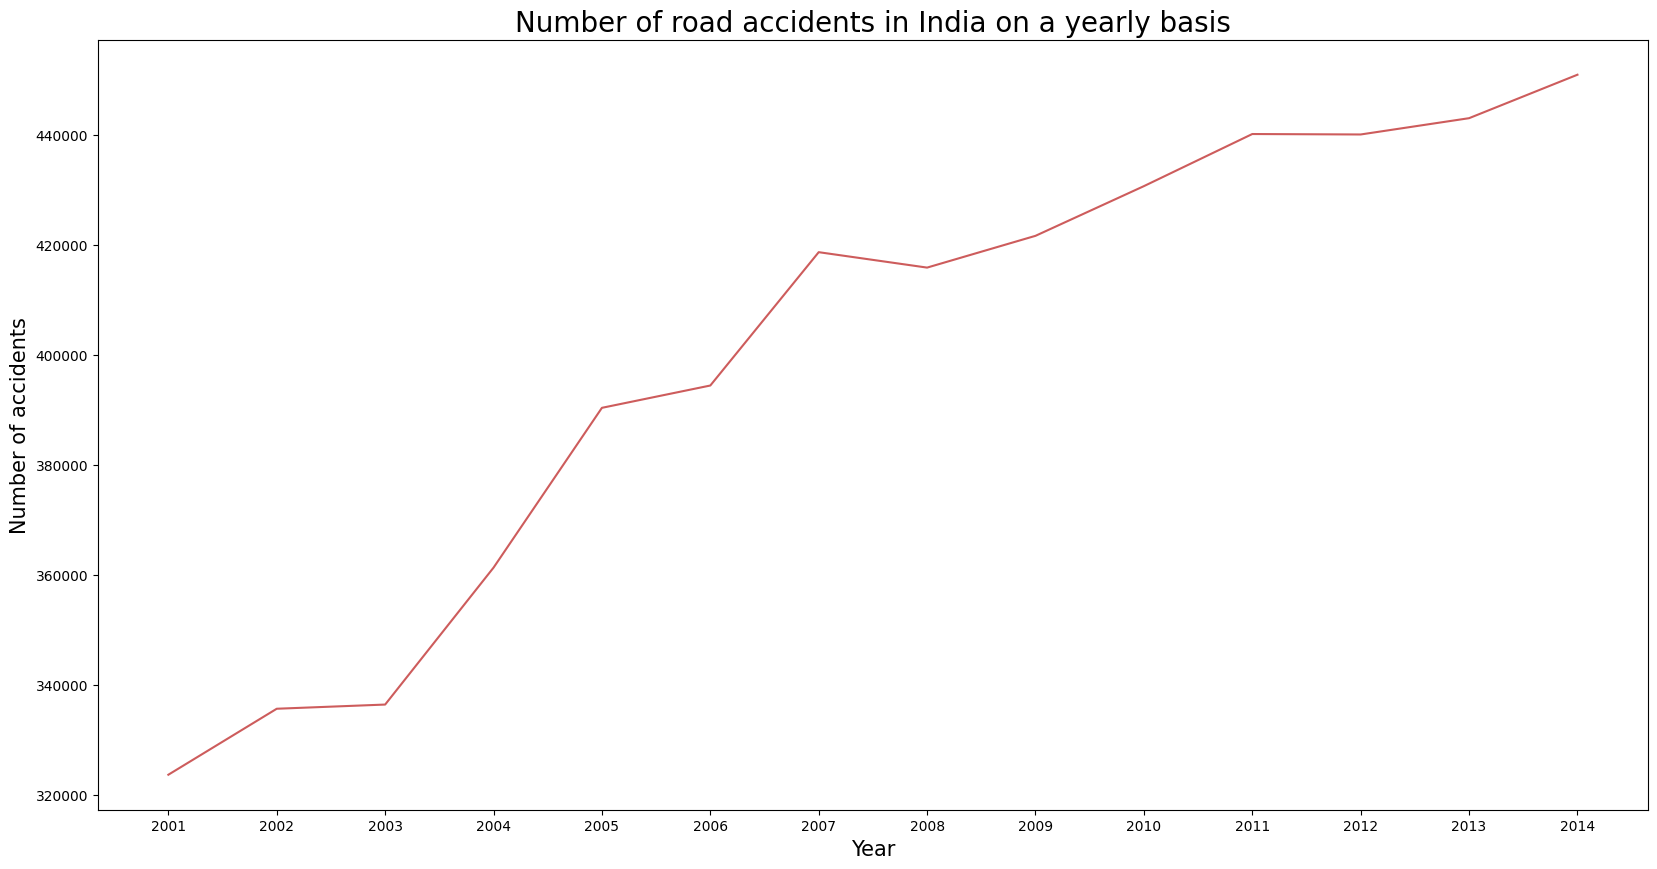

In [32]:
plt.figure(figsize=(20,10))

plt.plot(df_year['YEAR'],df_year['Total'], color='indianred')
plt.title('Number of road accidents in India on a yearly basis',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of accidents',size=15)
plt.xticks(np.arange(2001,2015,1),size=10)

<ipython-input-33-5293eed8de9b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_year['YEAR'],y=df_year['Percentage change'],palette='viridis')


([<matplotlib.axis.YTick at 0x7e5b11538070>,
 [Text(0, -0.02, '−0.02'),
  Text(0, -0.01, '−0.01'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.009999999999999998, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.030000000000000002, '0.03'),
  Text(0, 0.039999999999999994, '0.04'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.06999999999999999, '0.07'),
  Text(0, 0.08, '0.08')])

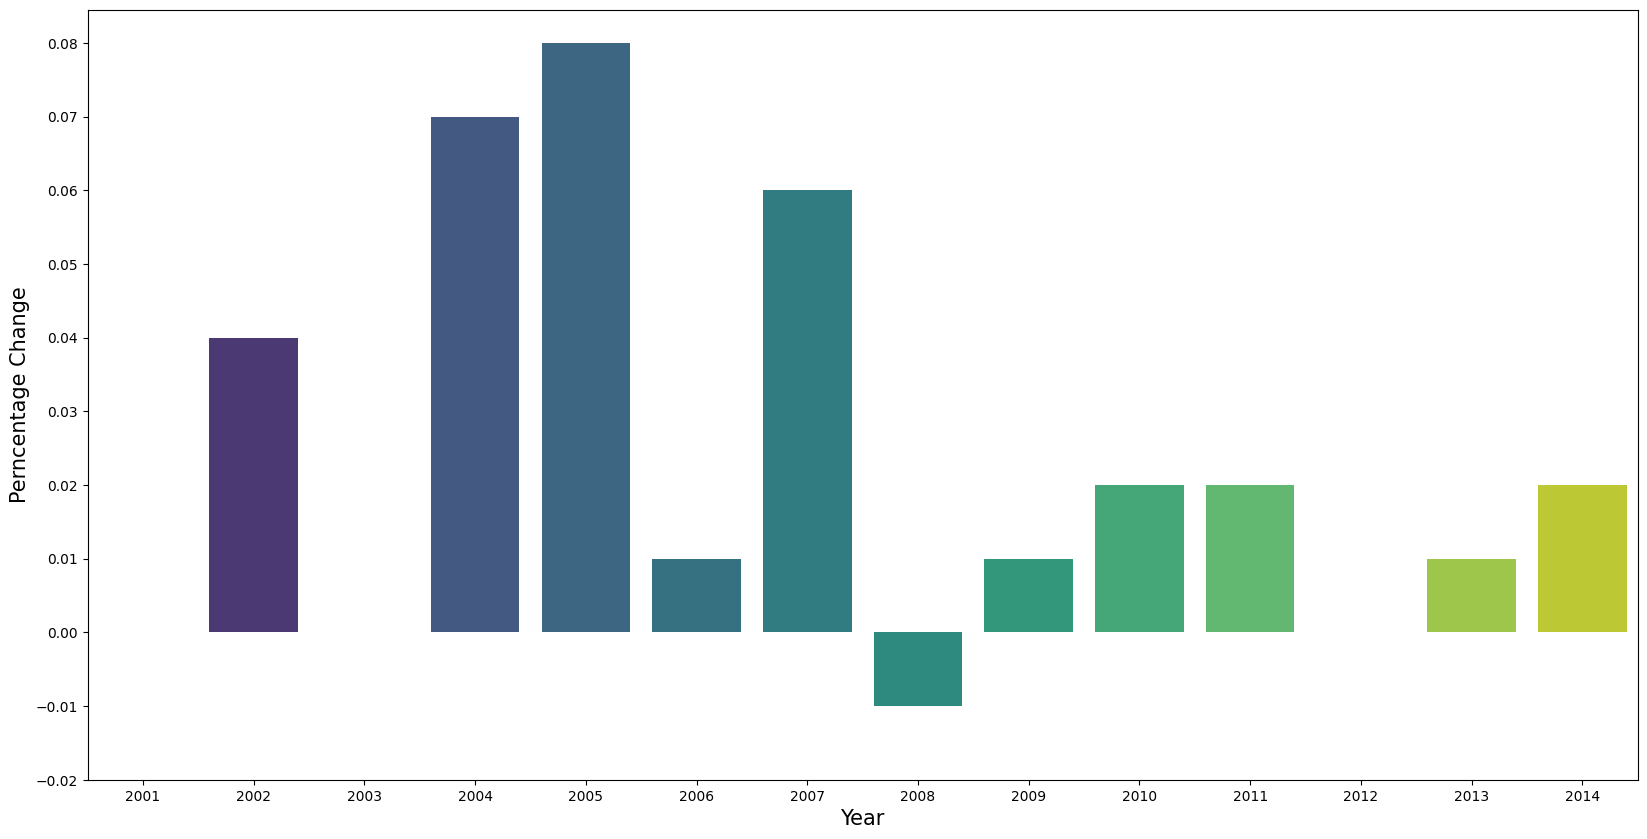

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_year['YEAR'],y=df_year['Percentage change'],palette='viridis')
plt.xlabel('Year',size=15)
plt.ylabel('Perncentage Change',size=15)
plt.yticks(np.arange(-0.02,0.09,0.01))


([<matplotlib.axis.XTick at 0x7e5b11416800>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014')])

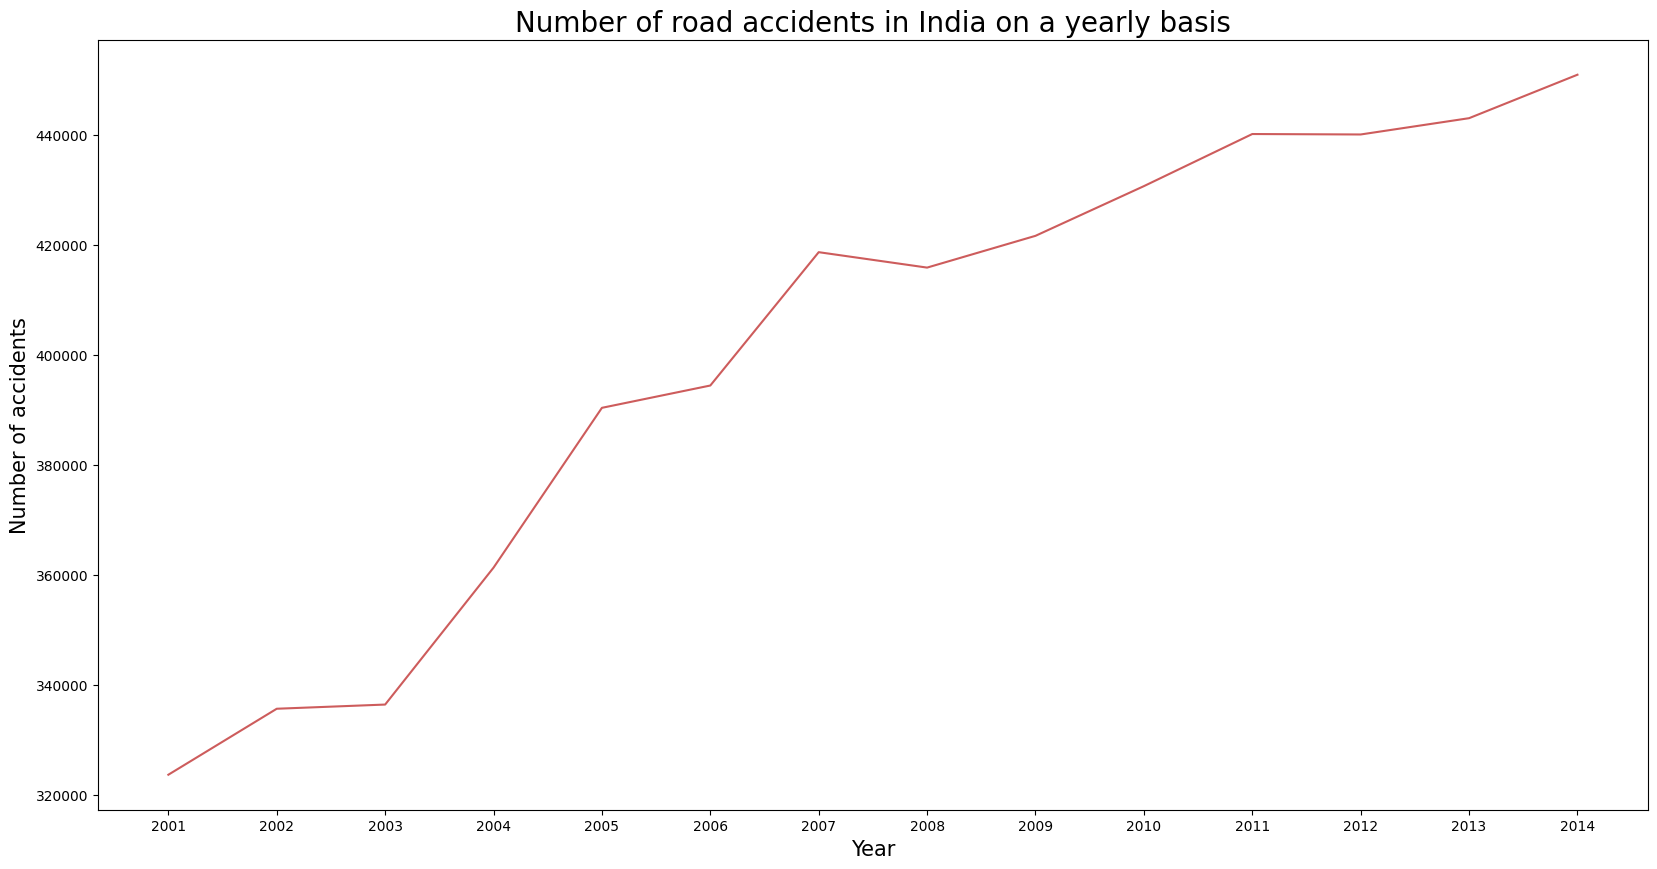

In [34]:
plt.figure(figsize=(20,10))

plt.plot(df_year['YEAR'],df_year['Total'], color='indianred')
plt.title('Number of road accidents in India on a yearly basis',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of accidents',size=15)
plt.xticks(np.arange(2001,2015,1),size=10)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
x_matrix=df_year['YEAR'].values.reshape(-1,1)
y=df_year['Total'].values

In [37]:
reg=LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [38]:
reg.intercept_

-19883660.67032967

In [39]:
reg.coef_

array([10104.04395604])

In [40]:
regression=[]
a=np.arange(2015,2025)
for year in a:
    year=np.array([year])
    year=year.reshape(1,-1)
    regression.append(reg.predict(year))

In [41]:
df_predicted=pd.DataFrame(regression)

In [42]:
df_predicted=df_predicted.rename(columns={0:'Total'})

In [43]:
df_predicted.reset_index(drop=True,inplace=True)

In [44]:
years=np.arange(2015,2025,1)

In [45]:
df_temp=pd.DataFrame(years)
df_temp

,0
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021
7,2022
8,2023
9,2024


In [46]:
df_predicted['Year']=df_temp

In [47]:
df_predicted=df_predicted[['Year','Total']]

In [48]:
df_predicted['Total']=df_predicted['Total'].values.round(0)
df_predicted.index=df_predicted.index+1
df_predicted

,Year,Total
1,2015,475988.0
2,2016,486092.0
3,2017,496196.0
4,2018,506300.0
5,2019,516404.0
6,2020,526508.0
7,2021,536612.0
8,2022,546716.0
9,2023,556820.0
10,2024,566924.0


In [51]:
df_location=pd.read_csv('/content/only_road_accidents_data3.csv')

In [52]:
df_location.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [53]:
df_location_updated=df_location.iloc[:,47:]
df_location_updated.head()

""
0
1
2
3
4


In [54]:
df_month=pd.read_csv('/content/only_road_accidents_data_month2.csv')

In [55]:
df_month.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [56]:
i=0
for year in df_month['YEAR']:
    if year==2014:
        i+=1
    else:
        df_month=df_month.drop(i)
        i+=1

In [57]:
df_month.reset_index(drop=True)

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2014,25,13,19,19,18,15,15,16,15,23,18,22,218
1,Andhra Pradesh,2014,3809,3657,3641,3582,3986,3664,3167,3587,3225,3410,3346,4158,43232
2,Arunachal Pradesh,2014,28,10,10,21,9,12,13,14,14,15,22,17,185
3,Assam,2014,658,615,689,612,566,531,573,528,460,670,638,604,7144
4,Bihar,2014,777,742,852,714,985,1002,757,662,685,720,829,806,9531
5,Chandigarh,2014,35,22,31,40,32,25,22,32,38,31,28,30,366
6,Chhattisgarh,2014,1167,1110,1000,1020,1149,1051,934,877,910,1005,973,944,12140
7,D&N Haveli,2014,6,7,7,10,9,4,8,7,7,8,8,6,87
8,Daman & Diu,2014,6,4,3,3,2,2,0,5,1,5,2,6,39
9,Delhi Ut,2014,643,698,801,632,661,658,624,744,742,687,720,700,8310


In [58]:
df_month_top=df_month[df_month['TOTAL']>20000]
df_month_top

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
27,Andhra Pradesh,2014,3809,3657,3641,3582,3986,3664,3167,3587,3225,3410,3346,4158,43232
167,Gujarat,2014,2023,1978,2039,1846,2127,1988,1673,1633,1506,1817,1678,1844,22152
237,Karnataka,2014,3915,3649,3805,3577,4053,3772,3421,3428,3254,3517,3442,3861,43694
251,Kerala,2014,3332,2909,3005,2785,3162,2805,2834,2913,2911,2911,2963,3342,35872
279,Madhya Pradesh,2014,3375,3154,3470,3345,4107,3637,3104,2951,2946,3261,3288,3060,39698
293,Maharashtra,2014,3978,3714,3920,3847,4258,3784,3546,3450,3298,3291,3478,3818,44382
405,Rajasthan,2014,2143,1951,2130,2053,2484,2213,1976,1888,1839,2035,2104,1823,24639
433,Tamil Nadu,2014,5658,5293,5824,5303,5711,5915,5719,5936,5777,5516,5036,5562,67250
461,Uttar Pradesh,2014,2550,2311,2217,2067,2265,2209,2086,2017,1824,2023,2170,2325,26064


<ipython-input-60-29a9046fcd8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE/UT',y='TOTAL',data=df_month_top,palette='winter')


Text(0.5, 1.0, 'States with highest accidents in 2014')

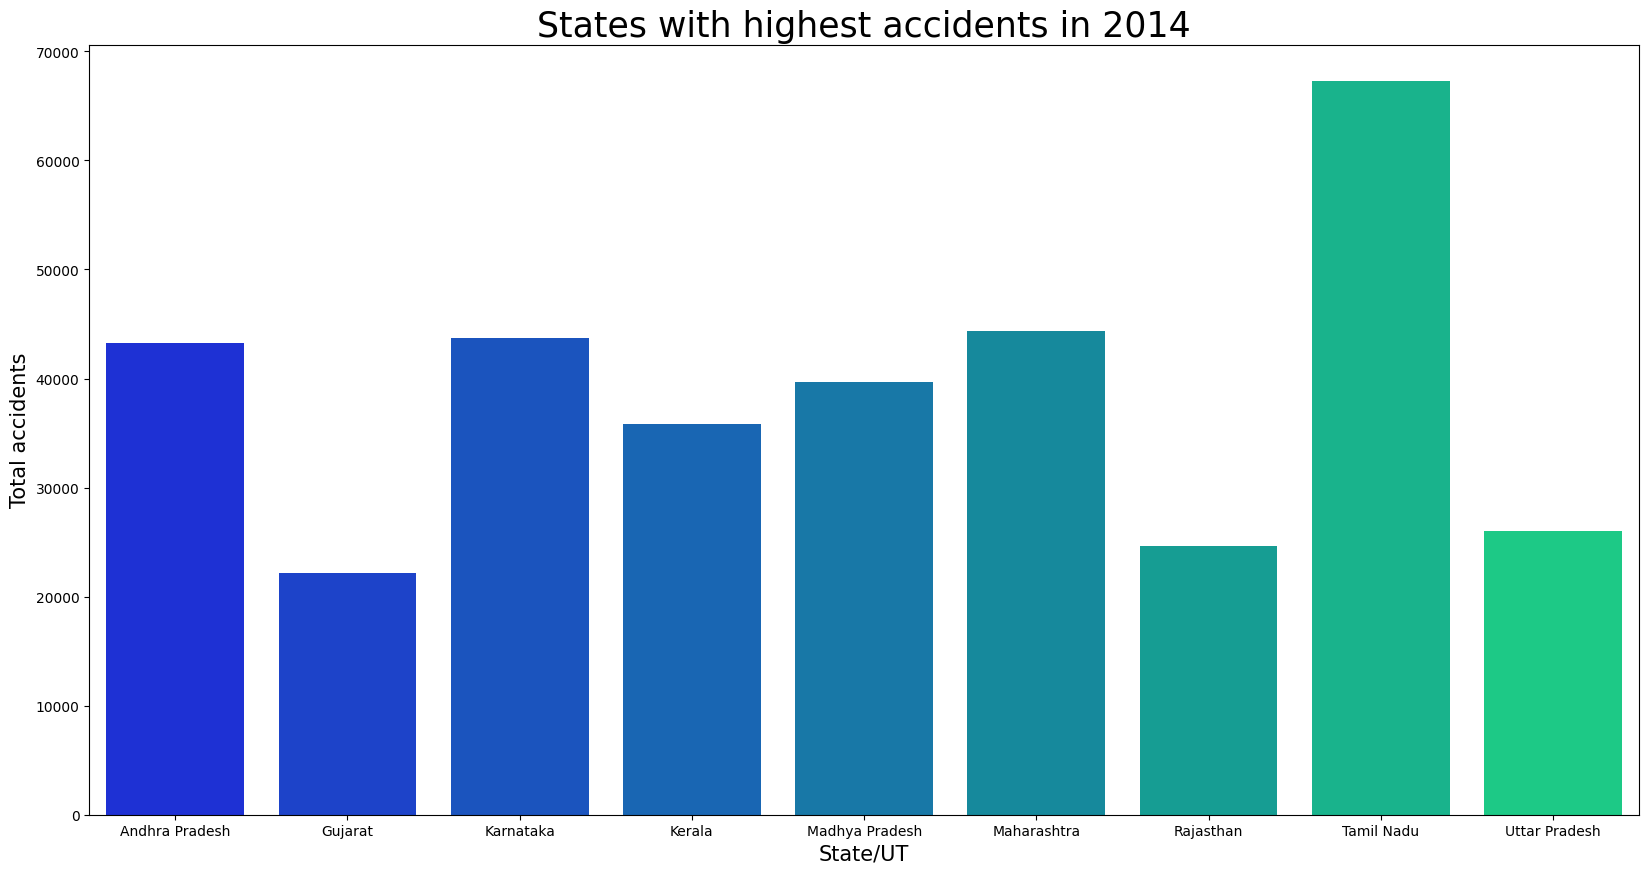

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x='STATE/UT',y='TOTAL',data=df_month_top,palette='winter')
plt.xlabel('State/UT',size=15)
plt.ylabel('Total accidents',size=15)
plt.title('States with highest accidents in 2014',size=25)

In [61]:
df_tamil_nadu=df_month.loc[df_month['STATE/UT'].isin(['Tamil Nadu'])]
df_karnataka=df_month.loc[df_month['STATE/UT'].isin(['Karnataka'])]
df_maharashtra=df_month.loc[df_month['STATE/UT'].isin(['Maharashtra'])]
df_delhi=df_month.loc[df_month['STATE/UT'].isin(['Delhi Ut'])]

In [62]:
df_tamil_nadu

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
433,Tamil Nadu,2014,5658,5293,5824,5303,5711,5915,5719,5936,5777,5516,5036,5562,67250


In [63]:
df_delhi

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
139,Delhi Ut,2014,643,698,801,632,661,658,624,744,742,687,720,700,8310


In [64]:
df_karnataka

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
237,Karnataka,2014,3915,3649,3805,3577,4053,3772,3421,3428,3254,3517,3442,3861,43694


In [65]:
df_maharashtra

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
293,Maharashtra,2014,3978,3714,3920,3847,4258,3784,3546,3450,3298,3291,3478,3818,44382


([<matplotlib.axis.XTick at 0x7e5b0e2cb010>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

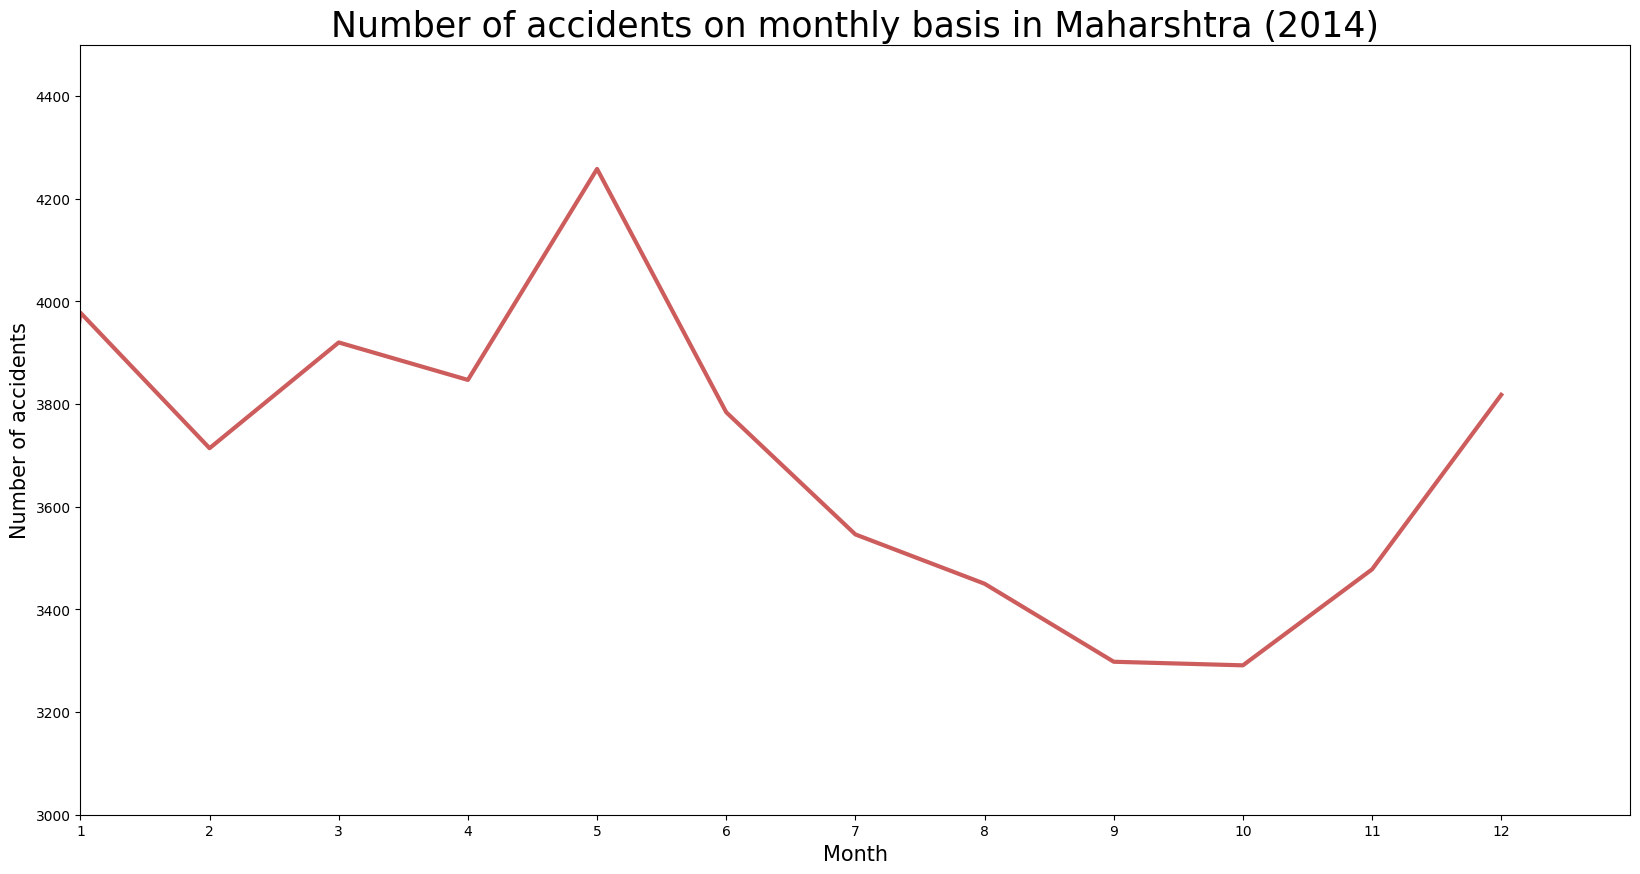

In [66]:
plt.figure(figsize=(20,10))
val=df_maharashtra.iloc[:,1:14].values
plt.plot(val[0],color='indianred',linewidth=3)
plt.xlim(1,13)
plt.ylim(3000,4500)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Maharshtra (2014)',size=25)
plt.xticks(np.arange(1,13))

([<matplotlib.axis.XTick at 0x7e5b0e17c040>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

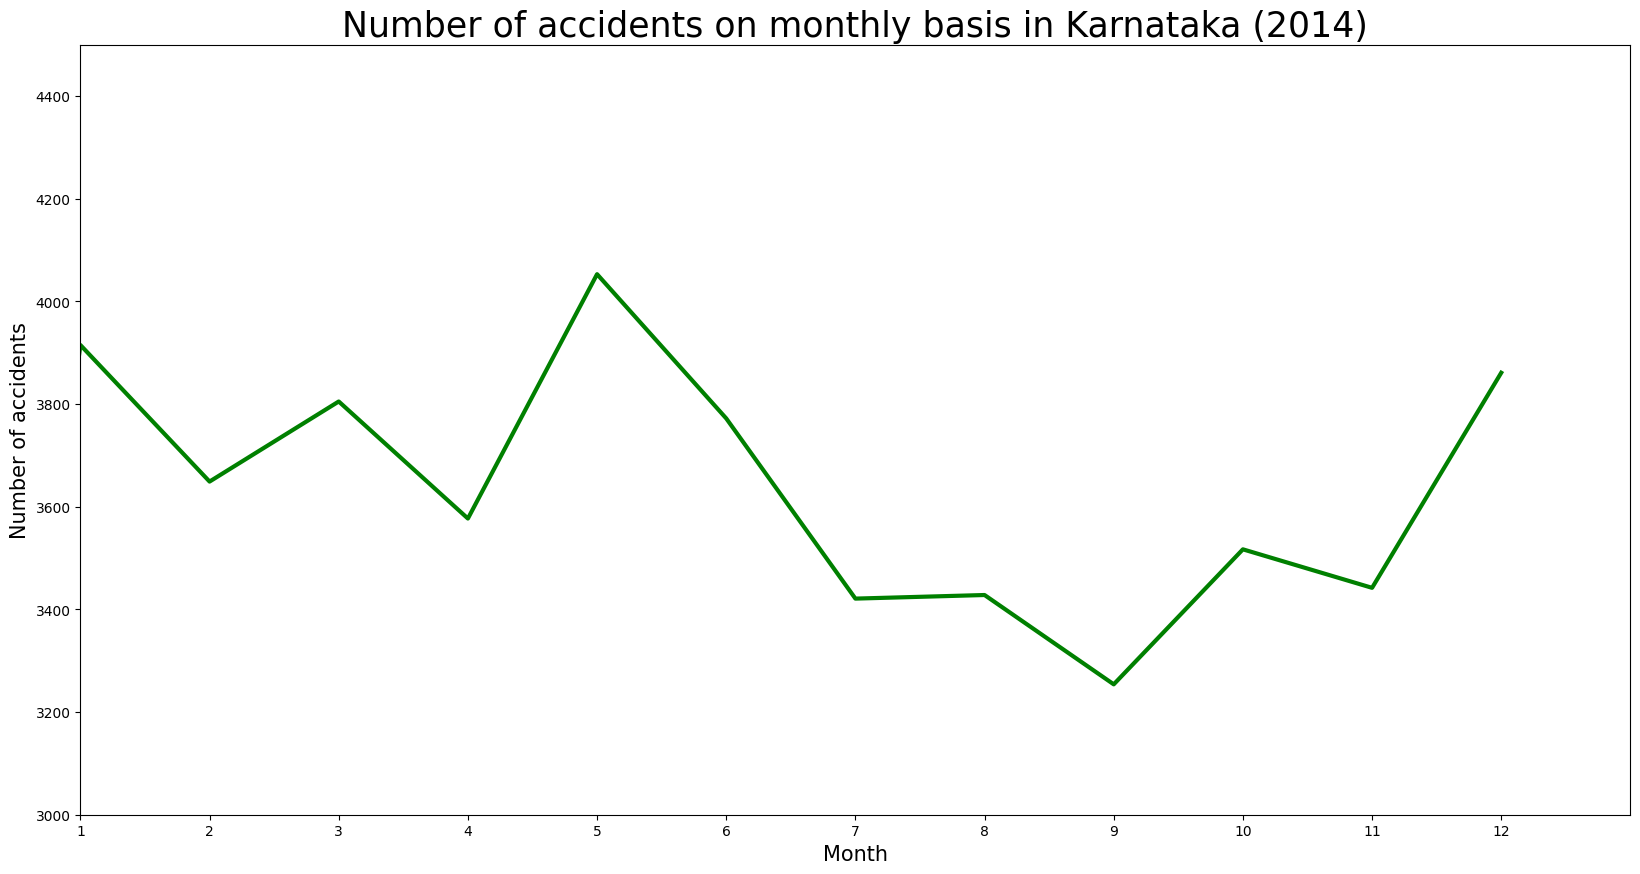

In [67]:
plt.figure(figsize=(20,10))
val=df_karnataka.iloc[:,1:14].values
plt.plot(val[0],color='green',linewidth=3)
plt.xlim(1,13)
plt.ylim(3000,4500)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Karnataka (2014)',size=25)
plt.xticks(np.arange(1,13))

Text(0.5, 1.0, 'Number of accidents on monthly basis in Tamil Nadu (2014)')

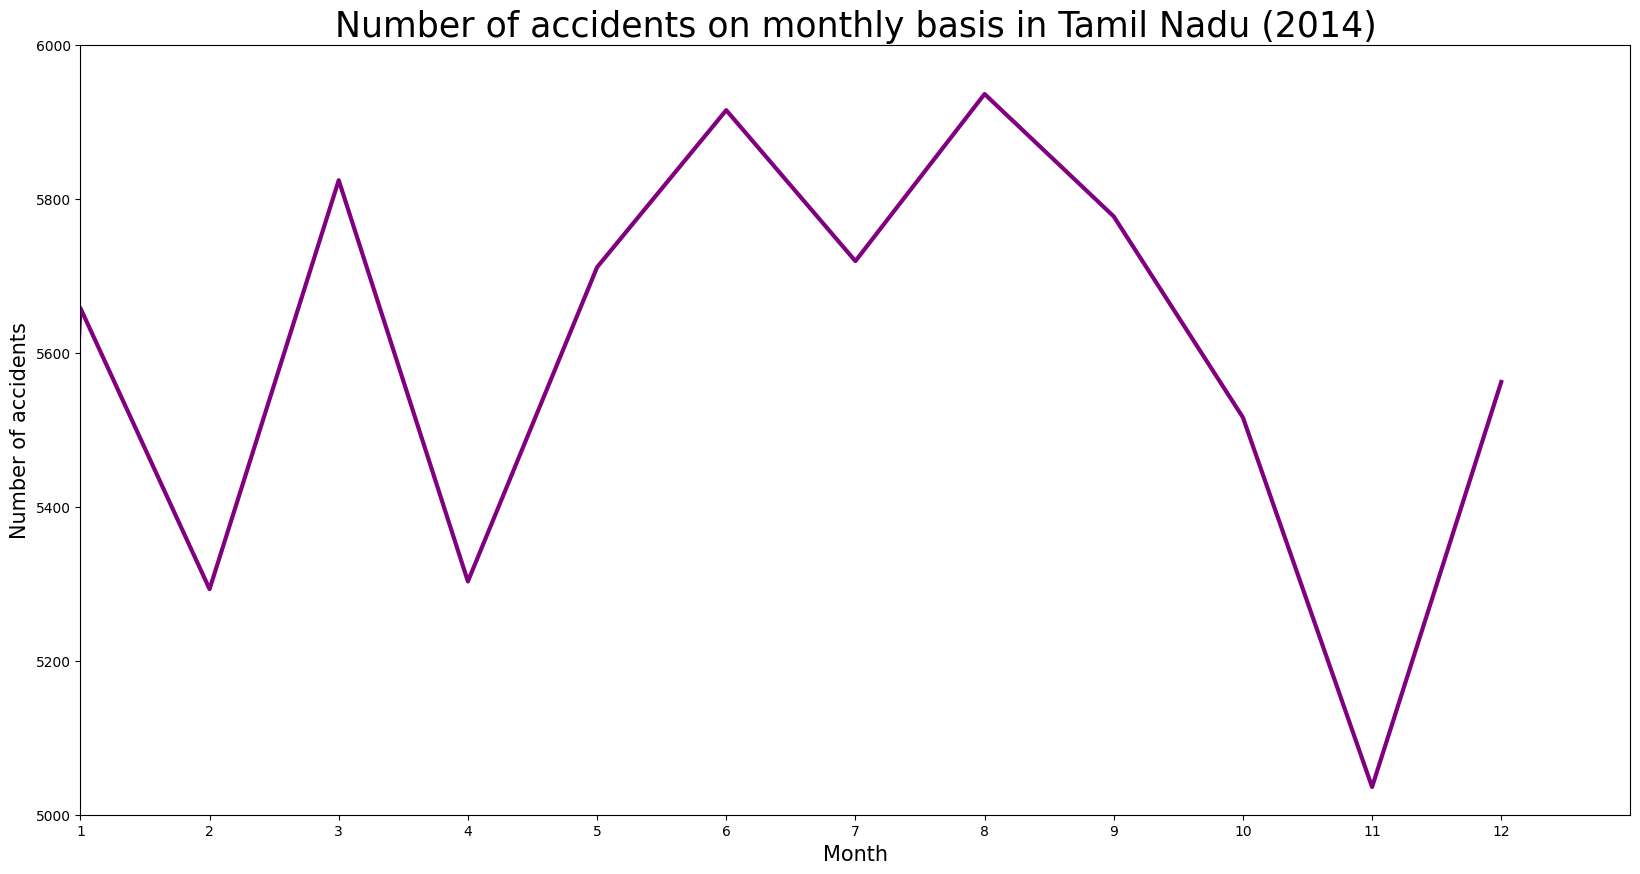

In [68]:
plt.figure(figsize=(20,10))
val=df_tamil_nadu.iloc[:,1:14].values
plt.plot(val[0],color='purple',linewidth=3)
plt.xlim(1,13)
plt.ylim(5000,6000)
plt.xticks(np.arange(1,13))
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Tamil Nadu (2014)',size=25)

([<matplotlib.axis.XTick at 0x7e5b0e06fc10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

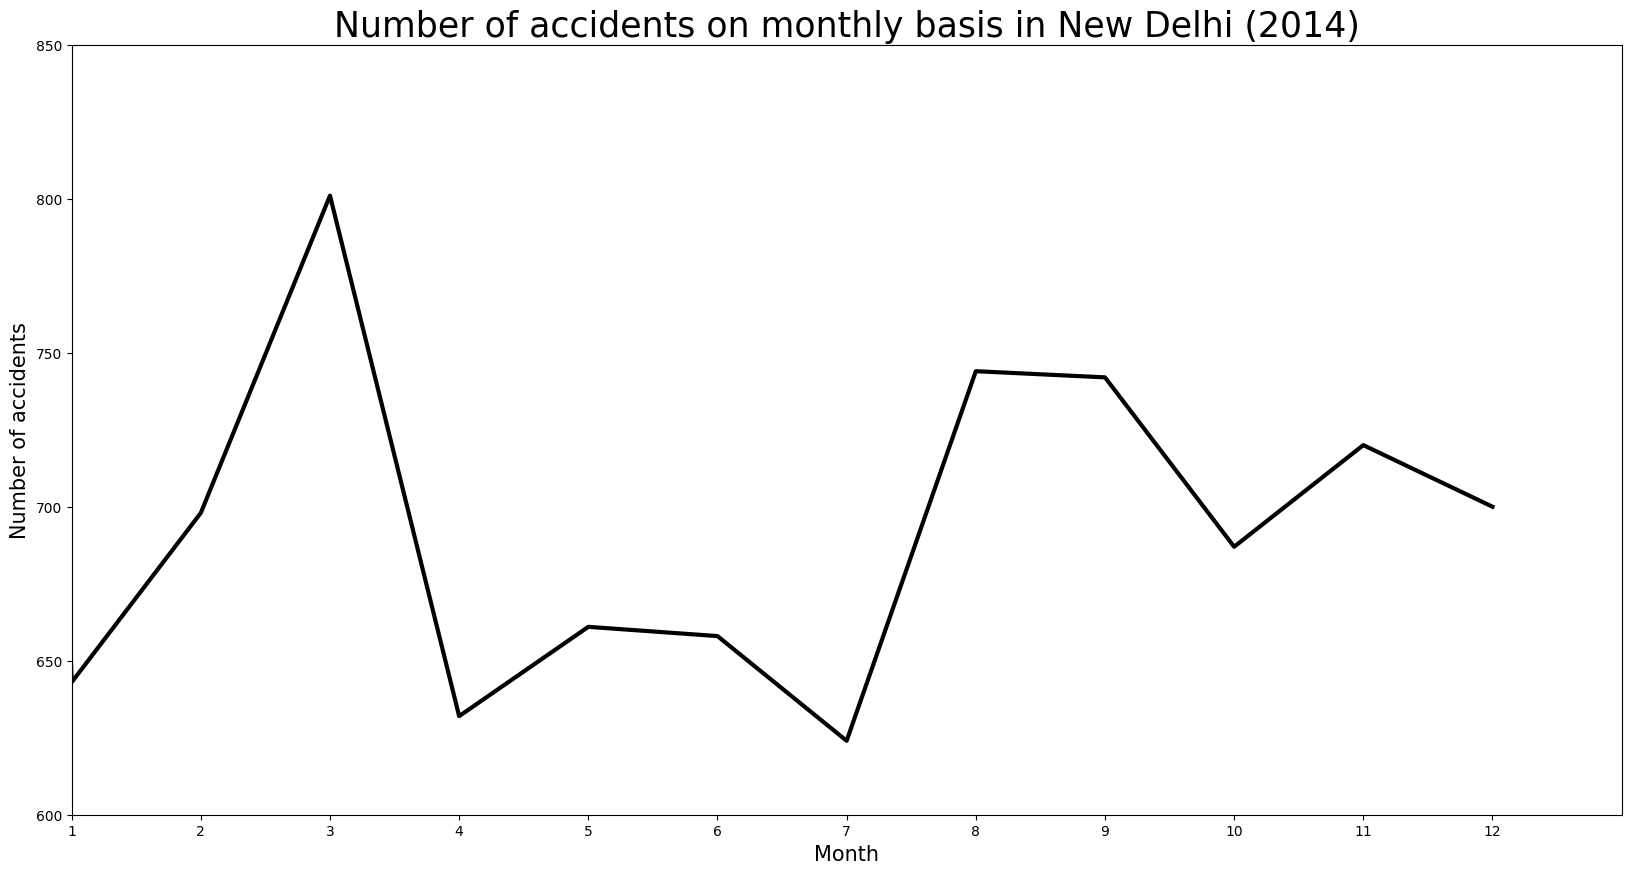

In [69]:
plt.figure(figsize=(20,10))
val=df_delhi.iloc[:,1:14].values
plt.plot(val[0],color='black',linewidth=3)
plt.xlim(1,13)
plt.ylim(600,850)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in New Delhi (2014)',size=25)
plt.xticks(np.arange(1,13))